[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/4_2_Trees.ipynb)


Load the data and view

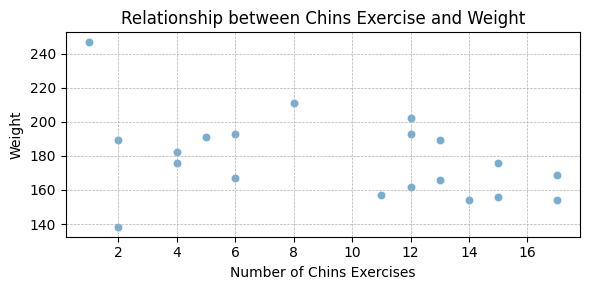

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_linnerud

# Load the Linnerud dataset as a DataFrame
linnerud = load_linnerud(as_frame=True)

# Extract the 'Chins' feature from the data and 'Weight' from the target for our analysis
x = linnerud.data['Chins']
y = linnerud.target['Weight']

# Plotting the relationship between 'Chins' and 'Weight'
plt.figure(figsize=(6, 3))  # Set the figure size
plt.scatter(x, y, alpha=0.6, edgecolors="w", linewidth=0.5)  # Scatter plot with some aesthetics
plt.title("Relationship between Chins Exercise and Weight")  # Title for the plot
plt.xlabel("Number of Chins Exercises")  # x-axis label
plt.ylabel("Weight")  # y-axis label
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # Adding a grid for better readability
plt.tight_layout()  # Adjust layout for better spacing

# Display the plot
plt.show()


Build a regression tree using weight as the target and number of chin-ups as a predictor

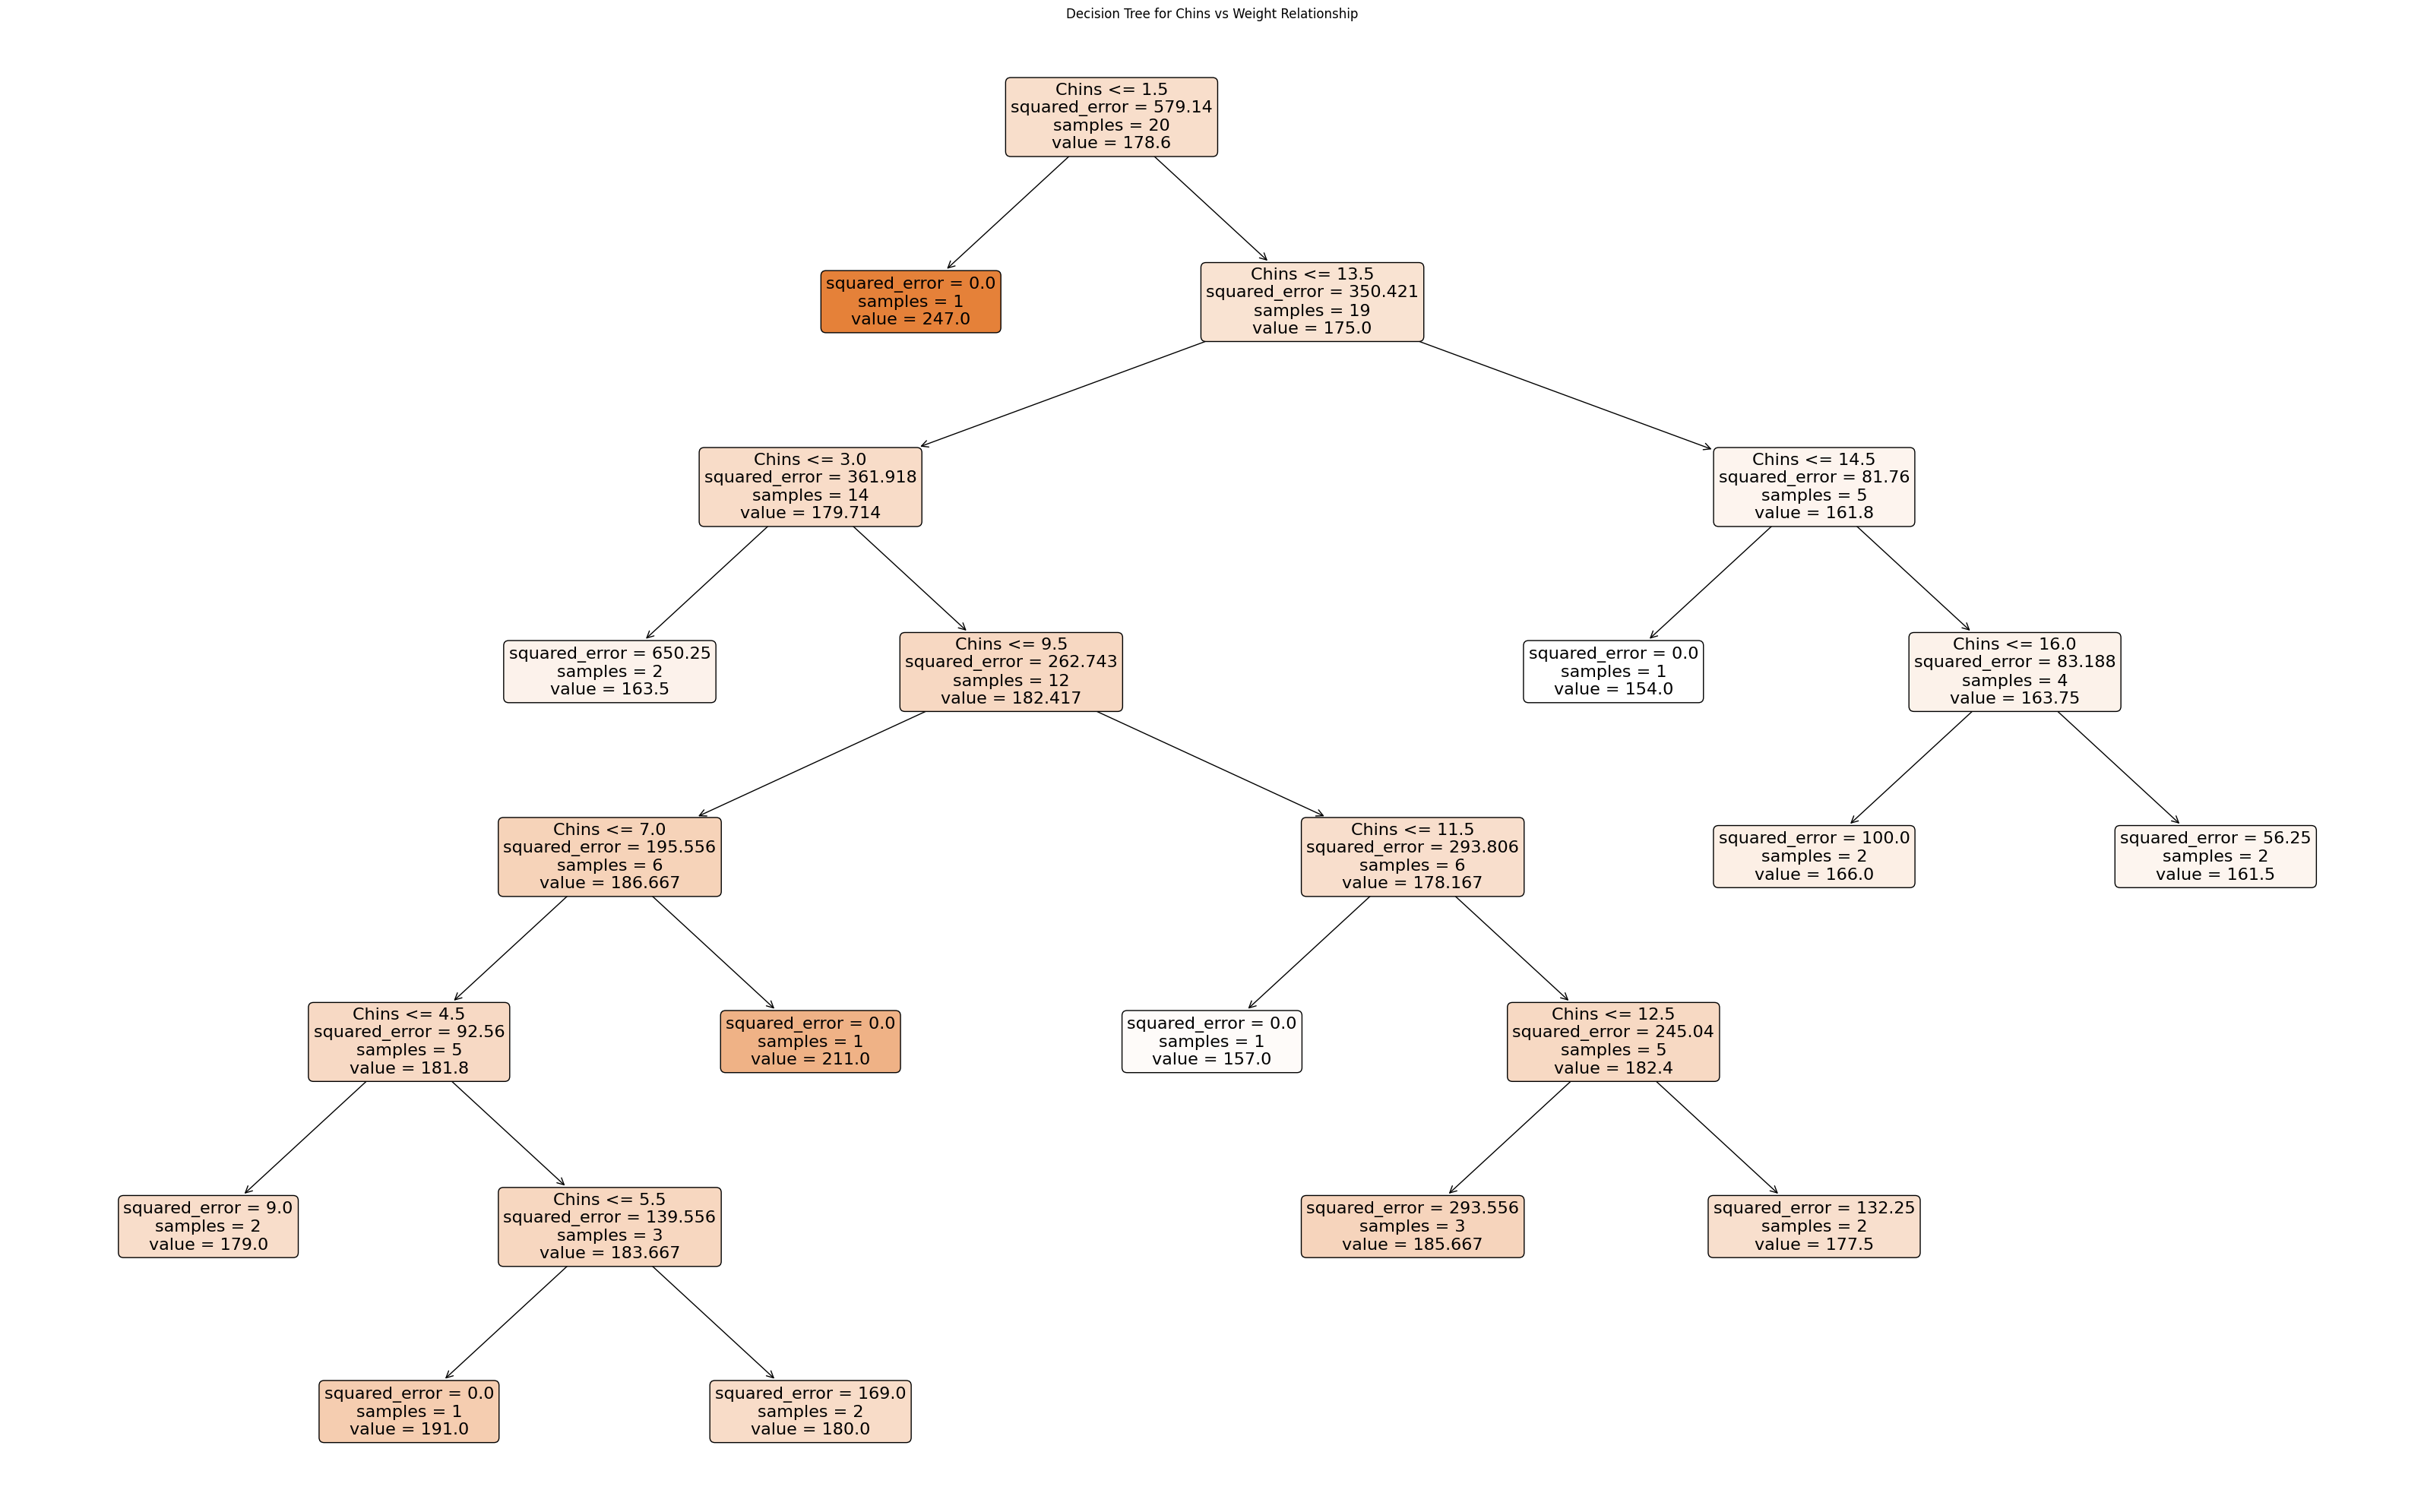

In [3]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Convert 'Chins' column to a DataFrame which is a format that's often preferred for scikit-learn methods
x_df = pd.DataFrame({"Chins": linnerud.data.Chins})

# Initialize a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Fit the decision tree model with our data
fitted_tree = regressor.fit(x_df, y)

# Visualize the decision tree structure
plt.figure(figsize=(32, 20))  # Set a large figure size for clarity
tree.plot_tree(fitted_tree, feature_names=["Chins"], fontsize=16, filled=True, rounded=True)
# Used `filled=True` and `rounded=True` for better aesthetics in visualization
plt.title("Decision Tree for Chins vs Weight Relationship")  # Add a title for clarity
plt.tight_layout()  # Adjust layout for better spacing

# Display the decision tree
plt.show()


Simplify the tree so that the maximum depth is 2

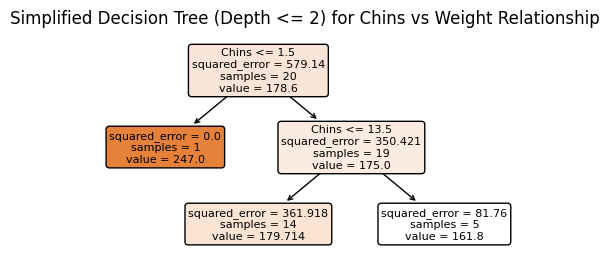

In [4]:
# Initialize a Decision Tree Regressor with a maximum depth of 2
# This restricts the tree to have a depth of 2 or less, making it simpler and easier to visualize
regressor = DecisionTreeRegressor(max_depth=2)

# Fit the decision tree model with our data
fitted_tree = regressor.fit(x_df, y)

# Set up the visualization for the decision tree
plt.figure(figsize=(6, 3))  # Define the figure size
tree.plot_tree(fitted_tree, feature_names=["Chins"], fontsize=8, filled=True, rounded=True)
# Using filled and rounded aesthetics for a better visual
plt.title("Simplified Decision Tree (Depth <= 2) for Chins vs Weight Relationship")  # Add a descriptive title

# Display the decision tree
plt.show()

Make it so that each terminal node has at least three observations

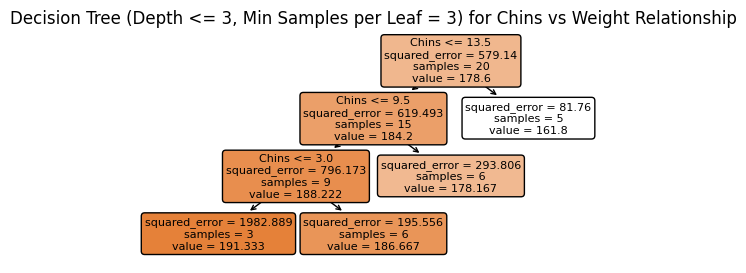

In [5]:
# Initialize a Decision Tree Regressor with specific constraints:
# - max_depth=3: Restricts the tree to a maximum depth of 3
# - min_samples_leaf=3: Ensures each terminal (leaf) node has at least 3 observations
regressor = DecisionTreeRegressor(max_depth=3, min_samples_leaf=3)

# Fit the decision tree model with our data
fitted_tree = regressor.fit(x_df, y)

# Set up the visualization for the decision tree
plt.figure(figsize=(6, 3))  # Define the figure size for better readability
tree.plot_tree(fitted_tree, feature_names=["Chins"], fontsize=8, filled=True, rounded=True)
# Using filled and rounded aesthetics for a clearer and visually appealing tree structure
plt.title("Decision Tree (Depth <= 3, Min Samples per Leaf = 3) for Chins vs Weight Relationship")  # Provide a descriptive title

# Display the decision tree
plt.show()

Explore what is happening when the tree makes a split. Between each successive x value a split can be made. Find the squared error loss of splitting the data between each successive data point and assigning the mean of the groups as the estimate for that group.

In [6]:

# Create a DataFrame for easier data manipulation
dat = pd.DataFrame({
    "y": linnerud.target.Weight,
    "x": linnerud.data.Chins
})

# Define all possible split points for the 'Chins' variable
possible_splits = np.arange(1.5, 17.5, 1)

# Initialize a list to store squared error loss values for each split
sel_vals = []

# Calculate squared error loss for each possible split
for split in possible_splits:
    # Compute mean of target variable for observations to the left and right of the split
    left_y_mean = dat.loc[dat.x < split, 'y'].mean()
    right_y_mean = dat.loc[dat.x >= split, 'y'].mean()

    # Calculate squared error loss for both partitions
    sel_left = np.sum((dat.loc[dat.x < split, 'y'] - left_y_mean) ** 2)
    sel_right = np.sum((dat.loc[dat.x >= split, 'y'] - right_y_mean) ** 2)

    # Calculate combined squared error loss and store in list
    total_sel = (sel_left + sel_right) / len(dat)
    sel_vals.append(total_sel)

# Combine the possible splits and their corresponding squared error loss values into a DataFrame for comparison
result = pd.DataFrame({
    "Possible Split": possible_splits,
    "Squared Error Loss": sel_vals
})

print(result)


    Possible Split  Squared Error Loss
0              1.5          332.900000
1              2.5          550.527451
2              3.5          550.527451
3              4.5          558.860000
4              5.5          547.688095
5              6.5          548.539583
6              7.5          548.539583
7              8.5          503.386869
8              9.5          503.386869
9             10.5          503.386869
10            11.5          536.890000
11            12.5          497.486813
12            13.5          485.060000
13            14.5          524.009375
14            15.5          546.650000
15            16.5          546.650000


What if we consider all the predictors

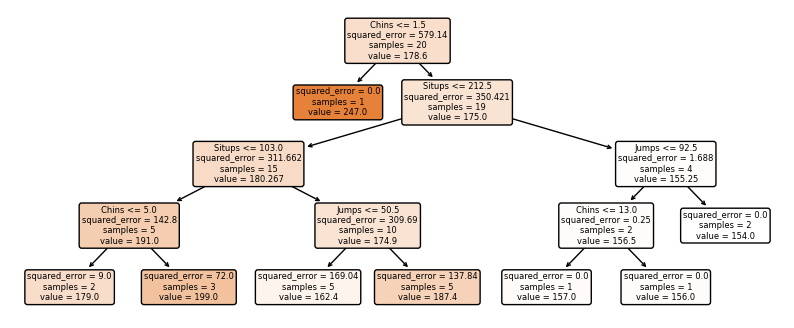

In [7]:
# Extract predictors and target variable
X = linnerud.data[['Chins', 'Situps', 'Jumps']]
y = linnerud.target['Weight']

# Initialize and train the regression tree model
reg_tree = DecisionTreeRegressor(max_depth=4)  # You can adjust the max_depth parameter as needed
reg_tree.fit(X, y)

# Visualizing the tree
plt.figure(figsize=(10, 4))
tree.plot_tree(reg_tree, fontsize=6, filled=True, feature_names=X.columns, rounded=True)
plt.show()